In [1]:
import igraph as ig
import sys, time, re
from random import randint
import cyrtranslit
import os
import pylab as plt
%matplotlib inline 

In [2]:
# f_prefix = '/home/ildar/diplom/graphmatching/data/'
f_prefix = 'data/'


def enrich_vk_graph(g):
    inst_dict = dict()
    pat = re.compile("(\d+),(.*),(.*),(.*)")
    pat_word = re.compile('[^a-zA-Zа-яА-Я\d\s]+')

    with open(f_prefix + 'vk_personal2.csv', 'r') as f:
        for line in f:
            try:
                uid, uname, name1, name2 = pat.match(line).groups()
                name1 = re.sub(pat_word, '', name1).strip().lower()
                name2 = re.sub(pat_word, '', name2).strip().lower()
                inst_dict[uid] = (uname, name1 + ' ' + name2)
            except AttributeError:
                print(line)
    for v in g.vs:
        uname, fname = inst_dict[v['name']]
        v['name'] = uname
#         v['fname'] = cyrtranslit.to_latin(fname, 'ru').replace("'", '')

def enrich_insta_graph(g):
    inst_dict = dict()
    pat = re.compile("(\d+),(.*),(.*)")
    pat_word = re.compile('[^a-zA-Zа-яА-Я\d\s]+')

    with open(f_prefix + 'inst_personal.csv', 'r') as f:
        for line in f:
            uid, uname, fname = pat.match(line).groups()
            fname = re.sub(pat_word, '', fname).strip().lower()
            inst_dict[uid] = (uname, fname)

    for v in g.vs:
        uname, fname = inst_dict[v['name']]
        v['name'] = uname
#         v['fname'] = cyrtranslit.to_latin(fname, 'ru').replace("'", '')

def read_edges(f_name):
    print(f_name)
    g = ig.Graph.Read_Ncol(f_name, names=True, directed=False)
    ig.summary(g)
    return g

def gen_seeds(seed_c, lg, rg):
    res = set()
    i = 0
    while len(res) < seed_c:
        try:
            inx = randint(0, lg.vcount())
            inx2 = rg.vs.find(name=lg.vs[inx]['name']).index
            res.add((inx, inx2))
        except ValueError:
            pass
    return res

In [3]:
inst_g = read_edges(f_prefix + 'inst_lid_rid.csv')
enrich_insta_graph(inst_g)

vk_g = read_edges(f_prefix + 'vk_lid_rid.csv')
enrich_vk_graph(vk_g)


data/inst_lid_rid.csv
IGRAPH UN-- 20794 240414 -- 
+ attr: name (v)
data/vk_lid_rid.csv
IGRAPH UN-- 24800 463468 -- 
+ attr: name (v)


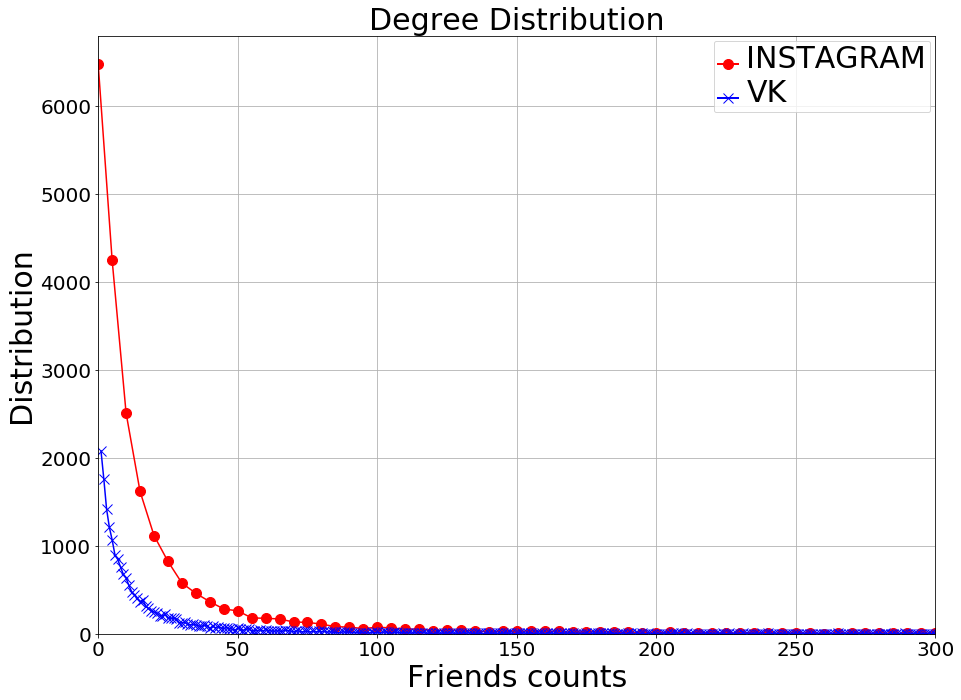

In [53]:
FLG_SAVE_IMG = True
pref_g1 = 'g1_'
pref_g2 = 'g2_'
OUT_FOLDER_NAME = '.'

def set_up_plot(d):
    axes = plt.axes()
    axes.autoscale_view()
    axes.set_title(d['label'], fontsize=d['fontsize'])
    plt.legend(loc='upper right', fancybox=True, shadow=True)
    plt.ylim(ymin=0)
    plt.xlim(xmin=0)
    
    leg = plt.legend()
    leg_lines = leg.get_lines()
    leg_texts = leg.get_texts()
    plt.setp(leg_lines, linewidth=2)
    plt.setp(leg_texts, fontsize = d['fontsize'])
    
    axes.tick_params(axis='x', labelsize=20)
    axes.tick_params(axis='y', labelsize=20)

def plot_of(d):
    fig_size = plt.rcParams["figure.figsize"]
    fig_size[0] = 15
    fig_size[1] = 11
    plt.rcParams["figure.figsize"] = fig_size
    
    plt.xlabel(d['xlabel'], fontsize=d['fontsize'])
    plt.ylabel(d['ylabel'], fontsize=d['fontsize'])
    for prefix in (pref_g1, pref_g2):
        plt.plot(d[prefix + 'x'], d[prefix + 'y'], alpha=d[prefix + 'alpha'], markersize=10, 
                 marker=d[prefix + 'marker'], label=d[prefix + 'label'], color=d[prefix + 'color'])
    set_up_plot(d)
    plt.grid()
    plt.ylim(ymax=d['ymax'])
    plt.xlim(xmax=d['xmax'])
    if FLG_SAVE_IMG: plt.savefig(os.path.join(OUT_FOLDER_NAME, d['img_name']))
    plt.show()

def plot_degs(g1, g2=None):
    get_x_y = lambda t : zip(*[(left, count) for left, _, count in t.bins()])
    xs_inst, ys_inst = get_x_y(g1.degree_distribution(bin_width=5))
    xs_vk, ys_vk = get_x_y(g1.degree_distribution(bin_width=1))
    
    d = {
            'ylabel': 'Distribution',
            'img_name': 'deg_dist.pdf',
            'ymax': None,
            'xmax' : 300,
            'xlabel': 'Friends counts',
            'label' : 'Degree Distribution',
            'fontsize' : 30,
            pref_g1 + 'color' : 'r',
            pref_g2 + 'color' : 'b',
            pref_g1 + 'marker' : 'o',
            pref_g2 + 'marker' : 'x',
            pref_g1 + 'alpha' : 1,
            pref_g2 + 'alpha' : 1,
            pref_g1 + 'label' : 'INSTAGRAM',
            pref_g2 + 'label' : 'VK',
            pref_g1 + 'x' : xs_inst,
            pref_g2 + 'x' : xs_vk,
            pref_g1 + 'y' : ys_inst,
            pref_g2 + 'y' : ys_vk
    }
    
    plot_of(d)


plot_degs(inst_g, vk_g)